### The "Satimage" dataset

In [164]:
import pandas as pd
url1="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_d16ac36cfdd64a9ca950c730b2251974.csv"
df1=pd.read_csv(url1,header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [165]:
df1.shape

(4435, 37)

In [166]:
url2="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_2c0dff51b9ec4334857185ce5d8c596e.csv"
df2=pd.read_csv(url2,header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [167]:
df2.shape

(2000, 37)

In [168]:
df1=df1.rename(columns={36:"Class"})

y_train=df1[["Class"]]
y_train.groupby("Class")["Class"].count()

Class
1    1072
2     479
3     961
4     415
5     470
7    1038
Name: Class, dtype: int64

In [169]:
y_train.groupby("Class")["Class"].count()/len(y_train)

Class
1    0.241714
2    0.108005
3    0.216685
4    0.093574
5    0.105975
7    0.234047
Name: Class, dtype: float64

In [170]:
X_train=df1.drop(["Class"],axis=1)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87


In [171]:
df2=df2.rename(columns={36:"Class"})

y_test=df2[["Class"]]
y_test.groupby("Class")["Class"].count()

Class
1    461
2    224
3    397
4    211
5    237
7    470
Name: Class, dtype: int64

In [172]:
y_test.groupby("Class")["Class"].count()/len(y_test)

Class
1    0.2305
2    0.1120
3    0.1985
4    0.1055
5    0.1185
7    0.2350
Name: Class, dtype: float64

In [173]:
X_test=df2.drop(["Class"],axis=1)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,80,102,102,79,76,102,102,79,76,102,...,109,87,79,107,109,87,79,107,113,87
1,76,102,102,79,76,102,106,83,76,102,...,109,87,79,107,113,87,79,103,104,83
2,80,98,106,79,76,94,102,76,76,94,...,104,79,79,95,100,79,79,95,96,75
3,76,94,102,76,76,94,102,76,76,94,...,100,79,79,95,96,75,79,95,100,75
4,76,94,102,76,76,94,102,76,76,89,...,96,75,79,95,100,75,75,95,100,79


In [174]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


test = SelectKBest(score_func=f_classif, k="all")

fit = test.fit(X_train, np.asarray(y_train).reshape(y_train.shape[0],))
features = fit.transform(X_train)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
17,3114.570992
16,3108.572768
20,2751.123818
21,2599.063507
13,2402.857416
12,2344.670769
4,2310.377954
28,2301.556126
29,2269.602068
5,2214.354037


In [175]:
X_scores=scores[scores["scores"]>1400]
len(X_scores)

28

In [176]:
Xp_train=X_train.iloc[:,X_scores.index]
Xp_train.head()

,17,16,20,21,13,12,4,28,29,5,...,24,23,25,31,7,27,11,3,35,18
0,112,92,84,103,126,101,84,88,121,102,...,102,81,126,100,79,104,83,94,87,118
1,103,84,84,99,112,92,84,84,107,102,...,88,78,121,87,83,100,79,79,79,104
2,99,84,84,99,103,84,80,84,99,102,...,84,81,107,79,79,87,79,83,79,104
3,99,84,76,99,99,84,84,84,99,94,...,84,81,99,79,79,79,76,79,79,104
4,99,76,76,99,99,84,80,84,103,94,...,84,85,99,79,76,79,79,79,87,104


In [177]:
Xp_test=X_test.iloc[:,X_scores.index]
Xp_test.head()

,17,16,20,21,13,12,4,28,29,5,...,24,23,25,31,7,27,11,3,35,18
0,103,76,80,107,99,76,76,79,107,102,...,79,88,107,87,79,87,83,79,87,118
1,107,80,80,112,103,76,76,79,107,102,...,79,88,107,87,83,87,87,79,83,118
2,95,80,80,95,107,80,76,79,95,94,...,79,78,103,79,76,79,76,79,75,100
3,95,80,80,91,95,80,76,79,95,94,...,79,78,95,75,76,79,76,76,75,100
4,91,80,80,91,95,80,76,79,95,94,...,79,74,95,75,76,75,76,76,79,100


In [113]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xp_train=pd.DataFrame(scaler.fit_transform(Xp_train))
Xp_train.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.252072,1.686860,1.120021,0.869948,1.855195,2.315886,1.091530,1.401588,1.646932,0.811100,...,2.399605,-0.078196,1.859293,0.916791,-0.186002,1.129426,0.031091,0.612219,0.233709,1.121586
1,0.857597,1.096876,1.120021,0.694688,1.240722,1.656825,1.091530,1.106001,1.033153,0.811100,...,1.373683,-0.236744,1.639671,0.230329,0.027763,0.917586,-0.181210,-0.190206,-0.189719,0.284495
2,0.682275,1.096876,1.120021,0.694688,0.845704,1.070993,0.796346,1.106001,0.682422,0.811100,...,1.080563,-0.078196,1.024730,-0.192109,-0.186002,0.229107,-0.181210,0.023774,-0.189719,0.284495
3,0.682275,1.096876,0.525847,0.694688,0.670141,1.070993,1.091530,1.106001,0.682422,0.460365,...,1.080563,-0.078196,0.673335,-0.192109,-0.186002,-0.194573,-0.340436,-0.190206,-0.189719,0.284495
4,0.682275,0.506891,0.525847,0.694688,0.670141,1.070993,0.796346,1.106001,0.857788,0.460365,...,1.080563,0.133202,0.673335,-0.192109,-0.346325,-0.194573,-0.181210,-0.190206,0.233709,0.284495


In [114]:
Xp_test=pd.DataFrame(scaler.fit_transform(Xp_test))
Xp_test.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.884115,0.529094,0.843501,1.076855,0.700105,0.511838,0.513965,0.765263,1.069074,0.838676,...,0.74781,0.286501,1.062189,0.229688,-0.181847,0.227241,0.034720,-0.190038,0.240716,1.141239
1,1.057373,0.825754,0.843501,1.294235,0.874169,0.511838,0.513965,0.765263,1.069074,0.838676,...,0.74781,0.286501,1.062189,0.229688,0.023979,0.227241,0.242155,-0.190038,0.034535,1.141239
2,0.537599,0.825754,0.843501,0.555144,1.048232,0.808599,0.513965,0.765263,0.545329,0.491470,...,0.74781,-0.229160,0.887238,-0.185426,-0.336216,-0.188856,-0.328293,-0.190038,-0.377826,0.063158
3,0.537599,0.825754,0.843501,0.381240,0.526042,0.808599,0.513965,0.765263,0.545329,0.491470,...,0.74781,-0.229160,0.537338,-0.392983,-0.336216,-0.188856,-0.328293,-0.345172,-0.377826,0.063158
4,0.364340,0.825754,0.843501,0.381240,0.526042,0.808599,0.513965,0.765263,0.545329,0.491470,...,0.74781,-0.435424,0.537338,-0.392983,-0.336216,-0.396905,-0.328293,-0.345172,-0.171645,0.063158


In [115]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

model=OneVsRestClassifier(RandomForestClassifier(n_estimators=155,random_state=0)).fit(Xp_train, np.asarray(y_train).reshape(y_train.shape[0],))
model

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=155,
                                                     random_state=0))

In [116]:
from sklearn.metrics import accuracy_score
train_pred=model.predict(Xp_train)
test_pred=model.predict(Xp_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.9075


In [19]:
from sklearn.metrics import f1_score
print("F1 socre for train data: ",f1_score(y_train,train_pred,average="micro"))
print("F1 score for test data: ",f1_score(y_test,test_pred,average="micro"))

F1 socre for train data:  1.0
F1 score for test data:  0.9075


Confusion matrix for test data: 



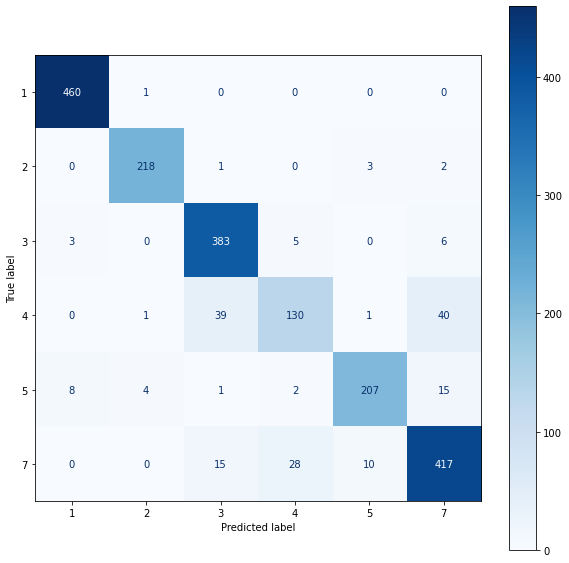

In [118]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
print("Confusion matrix for test data: \n")
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model,Xp_test,y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

In [119]:
Xp_train=X_train.iloc[:,X_scores.index]
Xp_test=X_test.iloc[:,X_scores.index]

In [120]:
model=OneVsRestClassifier(RandomForestClassifier(n_estimators=155,random_state=0)).fit(Xp_train, np.asarray(y_train).reshape(y_train.shape[0],))
model

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=155,
                                                     random_state=0))

In [121]:
from sklearn.metrics import accuracy_score
train_pred=model.predict(Xp_train)
test_pred=model.predict(Xp_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.9085


In [24]:
print("F1 socre for train data: ",f1_score(y_train,train_pred,average="micro"))
print("F1 score for test data: ",f1_score(y_test,test_pred,average="micro"))

F1 socre for train data:  1.0
F1 score for test data:  0.9085


Confusion matrix for test data: 



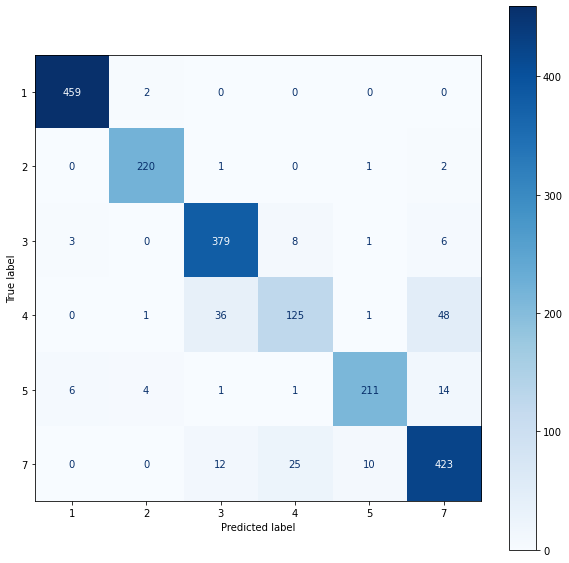

In [122]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
print("Confusion matrix for test data: \n")
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model,Xp_test,y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

#### Using feature selection and raw data produced better result than using standardized data. With standardized data, the accuracy on test data is 90.75%; with raw data, the accuracy on test data is 90.85%.

In [178]:
X=pd.concat([Xp_train,Xp_test],axis=0)
y=pd.concat([y_train,y_test],axis=0)

In [181]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(5148, 28)
(1287, 28)


In [195]:
from sklearn.ensemble import RandomForestClassifier
model=OneVsRestClassifier(RandomForestClassifier(n_estimators=260,random_state=0)).fit(X_train, np.asarray(y_train).reshape(y_train.shape[0],))
model

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=260,
                                                     random_state=0))

In [196]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.9168609168609169


In [197]:
print("F1 socre for train data: ",f1_score(y_train,train_pred,average="micro"))
print("F1 score for test data: ",f1_score(y_test,test_pred,average="micro"))

F1 socre for train data:  1.0
F1 score for test data:  0.9168609168609169


Confusion matrix for test data: 



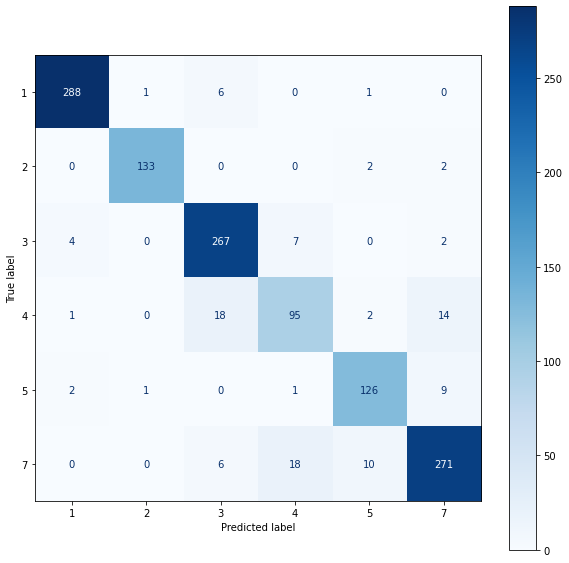

In [198]:
print("Confusion matrix for test data: \n")
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

#### "Satimage" dataset: Using only 28 of the 36 potential predictor variables and standardized data, with 80% of the data appropriated for training and 20% appropriated for testing, "OneVsRestClassifier" with "RandomForestClassifier" achieved a 91.7% accuracy on test data. 

### The "letter recognition" dataset

In [201]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_f68baac935e64aef84eb0773203e756b.csv"
df=pd.read_csv(url,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [202]:
df.shape

(20000, 17)

In [203]:
df=df.rename(columns={0:"Class"})

y=df[["Class"]]

y.groupby("Class")["Class"].count()

Class
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
Name: Class, dtype: int64

In [204]:
X=df.drop(["Class"],axis=1)
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [205]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(15000, 16)
(5000, 16)


In [37]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn import svm
import numpy as np

model=OneVsOneClassifier(svm.SVC(C=11,gamma="auto",decision_function_shape="ovo",random_state=0)).fit(X_train, np.asarray(y_train).reshape(y_train.shape[0],))
model

OneVsOneClassifier(estimator=SVC(C=11, decision_function_shape='ovo',
                                 gamma='auto', random_state=0))

In [39]:
from sklearn.metrics import accuracy_score
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.976


In [206]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441


In [207]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(16000, 16)
(4000, 16)


In [80]:
model=OneVsOneClassifier(svm.SVC(C=11,gamma="auto",decision_function_shape="ovo",random_state=0)).fit(X_train, np.asarray(y_train).reshape(y_train.shape[0],))
model

OneVsOneClassifier(estimator=SVC(C=11, decision_function_shape='ovo',
                                 gamma='auto', random_state=0))

In [69]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.978


In [73]:
from sklearn.metrics import f1_score
print("F1 socre for train data: ",f1_score(y_train,train_pred,average="micro"))
print("F1 score for test data: ",f1_score(y_test,test_pred,average="micro"))

F1 socre for train data:  1.0
F1 score for test data:  0.978


Confusion matrix for test data: 



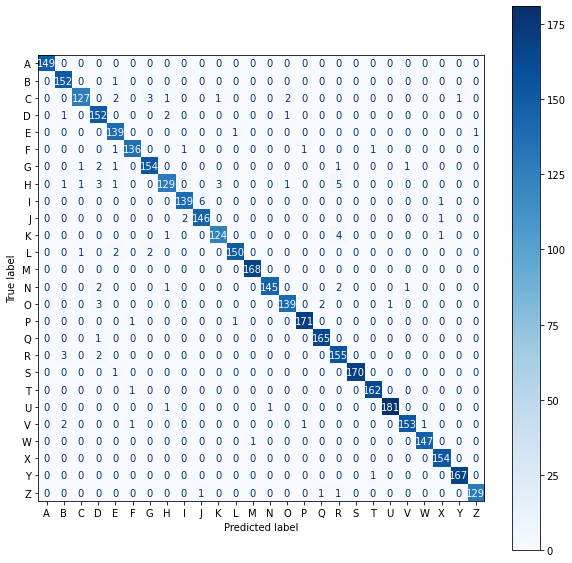

In [82]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
print("Confusion matrix for test data: \n")
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

In [218]:
from sklearn.ensemble import RandomForestClassifier
model=OneVsRestClassifier(RandomForestClassifier(n_estimators=150,random_state=0)).fit(X_train, np.asarray(y_train).reshape(y_train.shape[0],))
model

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=150,
                                                     random_state=0))

In [219]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.965


##### "Letter recognition" dataset: Using all 16 features, with standardized data and 80% of the dataset appropriated for training  (16,0000 instances) and 20% appropriated for testing (4,000 instances), accuracy on test data is 97.8%.

#### Both the "Satimage" dataset and "Letter recognition" dataset were part of the "StatLog Project" datasets. The above accuracies on test data, 91.7% for the "Satimage" dataset and 97.8% for the "Letter recognition" dataset, exceeded the best accuracies once listed on Statlog homepage. The best accuracies listed for "Satimage" and "Letter recognition" were 90.6% and 93.6%, respectively.